# Lindzen-Kuo method for solving linear internal waves in 2d

Help from Qiang Li.  Papers:  R. Lindzen and H.-L. Kuo. A reliable method for the numerical integration of a large class of ordinary and partial differential equations. Mon. Wea. Rev., 1969.

  - A. C. Dale, J. M. Huthnance, and T. J. Sherwin. Coastal-trapped waves and tides at near-inertial frequencies. J. Phys. Oceanogr., 31(10):2958–2970, 2001.
  - R. Lindzen and H.-L. Kuo. A reliable method for the numerical integration of a large class of ordinary and partial differential equations. Mon. Wea. Rev., 1969.
  - A. C. Dale and T. J. Sherwin. The extension of baroclinic coastal-trapped wave theory to superinertial frequencies. J. Phys. Oceanogr., 26(11):2305–2315, 1996.
  - T. Sherwin and N. Taylor. The application of a finite difference model of internal tide generation to the NW european shelf. Deutsche Hydrografische Zeitschrift, 42(3-6):151–167, 1989.
  - T. J. Sherwin and N. K. Taylor. Numerical investigations of linear internal tide generation in the rockall trough. Deep Sea Res. I, 37(10):1595–1618, 1990.
  - W.-S. Chuang and D.-P. Wang. Effects of density front on the generation and propagation of internal tides. J. Phys. Oceanogr., 11(10):1357–1374, 1981.
  
## Preliminaries

Following Dale and Sherwin (1996), we are solving the internal wave equation assuming a solution of the form:

$$ p(x,y,z,t) = \mathrm{Re}\left[p(x,z)\ \mathrm{exp}\left( i \left(ky-\omega t \right) \right) \right]$$


### IW equations:

\begin{eqnarray}
  i\omega u + f v & = & p_x\\
  -i\omega v + f u & = & - ik p\\
  u_x + i k v + w_z & = &0\\
  (N^2-\omega^2)w & = &  i\omega p_z
\end{eqnarray}

Now, for below, lets assume a forcing of a Kelvin wave on a coast:

\begin{eqnarray}
  U & = & 0\\
  P & = & 1+ \frac{(x-x_0)}{R} \\
  G_x & = & P_x\\ 
  fV & = & G_x\\
  -i\frac{k}{f}G_x & = & W_z
\end{eqnarray}


For $p$ we have:


$$\left(\omega^2-f^2\right)\frac{\partial}{\partial z} \left( \frac{\partial p/\partial z}{N^2-\omega^2} \right)  -\frac{\partial^2 p}{\partial x^2} + k^2p =0$$

or 

$$\frac{\partial^2 p}{\partial x^2} - \lambda^2 \frac{\partial^2 p}{\partial z^2}  + \gamma^2\frac{\partial P}{\partial z}\frac{\partial N^2}{\partial z} - k^2p =0$$

where 

$$\lambda^2 = \frac{\omega^2-f^2}{N^2-\omega^2}$$

and 
$$\gamma^2 = \frac{\omega^2-f^2}{\left(N^2-\omega^2\right)^2}$$



subject to boundary conditions:

  1) Surface: $\partial{p}/\partial{z} = 0$ at $z=0$
  
  2) Sea floor ($z=-h(x)$)
  $$ w = -\frac{dh}{dx}u  $$ 
  or in terms of $p$:
  $$ \left( \frac{\omega^2-f^2}{N^2-\omega^2} \right)\frac{\partial p}{\partial z} = \frac{dh}{dx} \left(\frac{\partial p}{\partial x} - \frac{fk}{\omega}p \right)  $$
  
  3) Open ocean: ($x=0$) Here the solution consists of an incoming forcing and a radiated response.  The ocean is assumed to be flat, so $p(x,z)$ can be decomposed into vertical modes:
  
  $$p(x,z) = \sum_{n=0}^{\infty} a_n\ \psi(z) \mathrm{exp}\left(il_nx\right)$$ 
  
where 

$$ l_n^2 = \left(\frac{n\pi}{H}\right)^2 \left(\frac{\omega^2-f^2}{N^2-\omega^2}\right) - k^2$$
Now $l_n$ has two roots.  If the ocean is on the lhs then $l_n>0$ are specified and propagating in, and $l_n<0$ are propagating out.

  4) For the shelf case we will have a wall at $x=L$ where $u=0$.  In terms of $p$?  
  
  $$ \frac{1}{\omega^2 - f^2}\left(fkp - \omega \frac{\partial p}{\partial x} \right) = 0 $$


## Conversion to sigma co-ordinates:

We will solve the equations above in sigma co-ordinates i.e. $Z = z/h(x)$, $X=x$.  The transform is $\partial / \partial z = \frac{1}{h}\partial / \partial Z$, and $\partial / \partial x = \partial / \partial X - \frac{Z}{H}\frac{dH}{dx} \partial /\partial Z$  We can rewrite the governing equation as:

$$ \frac{\partial^2P}{\partial X^2} + 
    \frac{\partial^2P}{\partial X\partial Z}G_2 + 
    \frac{\partial^2P}{\partial Z^2}G_4+ 
    \frac{\partial P}{\partial Z}G_3
   -k^2 P =0$$
   
where:

\begin{eqnarray}
  G_2 & = & -2\frac{Z}{H}H_x\\
  G_4 & = & \frac{Z^2}{H^2}H_x^2-\frac{\lambda^2}{H^2}\\
  G_3 & = & 2\frac{Z}{H^2}H_x^2 - \frac{Z}{H}H_{xx} + \gamma^2 \frac{\partial N^2}{\partial z}
\end{eqnarray}

This is identical to *Sherwin and Taylor (1989)*, Eq 3. except $\gamma$ and we have set their $s=0$.

The surface boundary condition is still the same:
$\partial p/\partial Z = 0 $ at $z=0$

The bottom boundary condition becomes:

$$\left(\frac{\lambda^2}{H^2} + Z\frac{H_x^2}{H^2}\right)\frac{\partial P}{\partial Z} -\frac{H_x}{H}\left(\frac{\partial P}{\partial x}\right) + \frac{H_x}{H}\frac{fk}{\omega}P =0  $$

Rewrite as 
$$b_1\frac{\partial P}{\partial Z} + b_2\frac{\partial P}{\partial x}+ b_3 P= 0$$

At the wall:

$$\frac{1}{\omega^2 - f^2}\left(fkP - \omega \left(\frac{\partial P }{\partial X} - \frac{Z}{H}H_x\frac{\partial P}{\partial Z} \right)\right)=0$$

## Discretization:

We discretize this on an even $X$ grid spaced by $I$ points spaced by $dx$ and an even $Z$ grid of $J$ points spaced by $dz$.  $i=1$ is on the left, and $j=1$ is the sea floor, and $j=J$ is the surface: i.e. $z = [-H, -H+dz, -H+2dz ...-2dz,-dz, 0]$  For $j=2$ to $J-1$, and $i=2$ to $I-1$:

\begin{eqnarray}
\frac{\partial^2P }{\partial x^2} & = &\frac{1}{dx^2}\left(P_{i+1,j}+P_{i-1,j}-2P_{i,j}\right)\\
G_2\frac{\partial^2P }{\partial x\partial z} & = & \frac{G_2}{4\,dx\, dz}\left(P_{i+1,j+1}-P_{i-1,j+1}-P_{i+1,j-1}+P_{i-1,j-1}\right)\\
G_4\frac{\partial^2P }{\partial z^2} & = & \frac{G_4}{dz^2}\left(P_{i,j+1}+P_{i,j-1}-2 P_{i,j}\right)\\
G_3\frac{\partial P }{\partial z} & = & \frac{G_3}{2dz}\left(P_{i,j+1}-P_{i,j-1}\right)\\
-k^2P & = &-k^2P_{i,j}
\end{eqnarray}

For $j=J$ (surface) we just have $dp/dz = 0$ so

$$ \frac{\partial^2 p}{\partial x^2} - k^2 p = 0$$

or:

$$ \frac{P_{i+1,J}+P_{i-1,J} - 2 P_{i,J}}{4 dx^2} - k^2 P_{i,J} = 0$$




For $j=1$ (bottom) we discretize as:

$$ \frac{b_1}{dz} (P_{i,2}-P_{i,1}) + \frac{b_2}{2dx} (P_{i+1,1}-P_{i-1,1}) + b_3 P_{i,1} = 0$$




## Writing as a discretized system of equations

The trick now is to write out the equations as a discretized system of equations:

$$ \mathtt{A}_i \mathbf{p}_{i-1} + \mathtt{B}_i \mathbf{p}_i + \mathtt{C}_i \mathbf{p}_{i+1} = \mathtt{D}_i $$ 

Define matrices $P2$ and $P1$:

$P2_{k,k} = -2, P2_{k,k-1} = 1,P2_{k,k+1} = 1$

$P1_{k,k} = 0, P1_{k,k-1} = -1,P2_{k,k+1} = 1$


### A

So, for $A_i$ we have for $k = 2$ to $J-1$:
\begin{eqnarray}
A_{k,k} & = & 1/dx^2\\
A_{k-1,k} & = & G_2/(4dx\,dz)\\
A_{k+1,k} & = & -G_2/(4dx\,dz)
\end{eqnarray}

Or, $A = \frac{I}{dx^2} - \frac{G_2}{4 dx dz}P_1
$

Now $k=1$ (seafloor)? $A_{1,1}=\frac{b_2}{2 dx}$.

At $k=J$ (surface)?   $A_{J,J}=0$, others are zero

### B

So, for $B_i$ we have for $k = 2$ to $J-1$:

\begin{eqnarray}
    B_{k,k} & = & -\frac{2}{dx^2} - \frac{2 G4}{dz^2}-k^2\\
    B_{k-1,k} & = & \frac{G_4}{dz^2} + \frac{G_3}{2dz}\\
    B_{k+1,k} & = & \frac{G_4}{dz^2} - \frac{G_3}{2dz}
\end{eqnarray}

Or $B = -(\frac{2}{dx^2}+k^2)I + \frac{1}{dz^2} G_4 P2 + \frac{1}{2dz}G3 P1$

for $k=J$ surface:  $B_{J,J}-B_{J-1,J} =0$

for $k=1$, bottom:  $B_{1,1}=-b_1/dz - b_3$ and   $B_{J,2}= b_1/dz$

### C

For $C_i$ we have for $k=2$ to $J-1$:
\begin{eqnarray}
C_{k,k} & = & 1/dx^2\\
C_{k-1,k} & = & -G2/(4dx\,dz)\\
C_{k+1,k} & = & G2/(4dx\,dz)
\end{eqnarray}

$C = I/dx^2 + \frac{1}{4dx\ dz} G_2 P1$

for $k=J$ (surface):  $C_{J,*}=0$

For $k=1$ (sea floor): $C_{1,1} =  -\frac{b_2}{2\,dx}$, others are zero.

### D

D=0.  


## Boundary conditions...

### LHS i=1:

To do the recursion to solve the above, we want a boundary conditions of the form:

$$P_1(x_1) = \alpha_1 P_2(x_1) + \beta_1$$

To get this, we say $P=P_0 + P_R$, and say that $P_0$ is specified and incoming, and $P_R$ is made of vertical standing modes $P_R=\sum_{j=1}^{J-2} r_j \phi_j(z) \mathrm{e}^{-ik_{xj}}$, or $P_R = E\mathbf{r}$.  We then look at the deriviative as well:

$$ P=P_0 + E\mathbf{r}$$

$$ \frac{dP}{dx} = \frac{dP_0}{dx} + \frac{E'}{dx}\mathbf{r}$$

where $E'=dx (dE/dx) = EK$, where $K$ is diagonal and $K_{j,j} = -ik_{xj} dx$.  This gives us two difference equations:

\begin{eqnarray}
    P_1&=&P_{01}+E\mathbf{r}\\
    P_2-P_1 &=& P_{02}-P_{01}+  E'\mathbf{r}
\end{eqnarray}

Note that $E$ and $E'$ are both $J \times J-2$ in size.  To get $\mathbf{r}$ we multiply the first equation by $E^T$ where $E^T$ is the *complex* transpose of $E$ (and is $J-2 \times J$ in size).  

$$ (E'E^T +I) P_1 = P_2 - P_{02} +(E'E^T +I )P_{01}$$
 
or $\alpha_1 = (E'E^T +I)^{-1}$ and $\beta_1 = -(E'E^T +I)^{-1} P_{02} + P_{01}$


### RHS i=I

#### Radiating:

If we have a radiating BC, then we can just use the above with the signs of $k_{xj}$ changed appropriately. 

$$E'_j = +ik_{xj}E$$

\begin{eqnarray}
    P_{I}&=&E\mathbf{r}\\
    P_{I}-P_{I-1} &=& dx E'\mathbf{r}
\end{eqnarray}

$$B_IP_{I-1} + C_IP_I = D_I$$


\begin{eqnarray}
  B_I & = & -I \\
  C_I & = & I- dx\ E'E^{-1}  \\
  D_I & = & 0
\end{eqnarray}



#### Wall:
If we have a wall, then 

$$\frac{1}{\omega^2 - f^2}\left(fkP - \omega \left(\frac{\partial P }{\partial X} - \frac{Z}{H}H_x\frac{\partial P}{\partial Z} \right)\right)=0$$

Defining:
\begin{eqnarray}
  c_1 & = &\frac{f k}{\omega^2-f^2} \\
  c_2 & = &\frac{-\omega}{\omega^2-f^2} \\
  c_3 & = &\frac{\omega}{\omega^2-f^2}\frac{Z}{H}H_x
\end{eqnarray}

or for $j=2...J-1$:

$$ c_1 P_{I,j} + c_2 \frac{P_{I,j}-P_{I-1,j}}{dx} + c_3 \frac{P_{I,j-1}-P_{I,j+1}}{2dz} = 0 $$ 

For  $j=1$:

$$ c_1 P_{I,1} + c_2 \frac{P_{I,1}-P_{I-1,1}}{dx} + c_3 \frac{P_{I,1}-P_{I,2}}{dz} = 0 $$ 

For $j=J$:

$$ c_1 P_{I,J} + c_2 \frac{P_{I,J}-P_{I-1,J}}{dx} + c_3 \frac{P_{I,J-1}-P_{I,J}}{dz} = 0 $$ 

So we need to gather terms and put in a form:
$$B_I P_{I-1} + C_I P_{I} = D_I$$

So, for $k=1...J$:
\begin{eqnarray}
    B_{i:k,k} & = & -c_2/dx\\
\end{eqnarray}
$B_i = 0$ for all other entries.

For $k=2...J-1$
\begin{eqnarray}
    C_{i:k,k} & = & c_1+\frac{c_2}{dx}\\
    C_{i:k,k-1} & = & \frac{c_3}{2dz}\\
    C_{i:k,k+1} & = & -\frac{c_3}{2dz}\\    
\end{eqnarray}

For $k=1$: $C_{i:1,1}=c_1+\frac{c_2}{dx} + \frac{c_3}{dz}$ and $C_{i:1,2}= -\frac{c_3}{dz}$

For $k=J$: $C_{i:J,J}=c_1+\frac{c_2}{dx} - \frac{c_3}{dz}$ and $C_{i:J,J-1}= \frac{c_3}{dz}$

and $D_I=0$.  

## Solving....

So, we are solving 

$$A_i P_{i-1} + B_i P_i + C_i P_{i+1} = D_i$$.  

The i=1 BC is written:

$$B_1 P_1 + C_1 P_2 = D_2$$

and the $i=I$ BC: 

$$B_I P_{I-1} + C_I P_{I} = D_I$$

Following Lindzen and Kuo, we define $I$ matrices $\alpha_i$ and vectors $\beta_i$:

$$P_i = \alpha_i P_{i+1} + \beta_i$$

We then can write a recursion relation for $\alpha_i$ and $\beta_i$ in terms of the $\alpha_{i-1}$ and $\beta_{i-1}$:

$$ \alpha_i = -\left( A_i \alpha_{i-1} + B_i\right)^{-1} C_i $$

and

$$ \beta_i = \left( A_i \alpha_{i-1} + B_i\right)^{-1} \left(D_i-A_i\beta_{i-1}\right)$$

So, we know $\alpha_1 = -B_1^{-1}C_1$ and $\beta_1= B_1^{-1}D_1$, we can get all the $\alpha_i$ and $\beta_i$ for $i=2...I-1$.  From the RHS BC we can get P_I:

$$ P_{I-1} = \alpha_{I-1}P_I + \beta_{I-1} $$

$$ P_I = \frac{D_I - B_I\beta_{I-1}}{C_I+\alpha_{I-1}B_I}$$




In [71]:
import numpy as np
import matplotlib.pyplot as plt
import logging
logging.basicConfig(level=logging.DEBUG, format='%(asctime)s - %(levelname)s - %(message)s')
doplot=2
%matplotlib nbagg

64
[ -1.30206345e-09  -2.14090221e-09  -3.40937417e-09  -4.39211145e-09
  -5.65699552e-09  -7.28428995e-09  -9.37660148e-09  -1.20647753e-08
  -1.55151289e-08  -1.99381778e-08  -2.55989055e-08  -3.28284164e-08
  -4.20364020e-08  -5.37231343e-08  -6.84885055e-08  -8.70337361e-08
  -1.10148526e-07  -1.38672425e-07  -1.73414156e-07  -2.15007269e-07
  -2.63677236e-07  -3.18898615e-07  -3.78939577e-07  -4.40335998e-07
  -4.97417432e-07  -5.42116876e-07  -5.64394863e-07  -5.53605896e-07
  -5.00913102e-07  -4.02360215e-07  -2.61586253e-07  -9.08212524e-08
   9.08212524e-08   2.61586253e-07   4.02360215e-07   5.00913102e-07
   5.53605896e-07   5.64394863e-07   5.42116876e-07   4.97417432e-07
   4.40335998e-07   3.78939577e-07   3.18898615e-07   2.63677236e-07
   2.15007269e-07   1.73414156e-07   1.38672425e-07   1.10148526e-07
   8.70337361e-08   6.84885055e-08   5.37231343e-08   4.20364020e-08
   3.28284164e-08   2.55989055e-08   1.99381778e-08   1.55151289e-08
   1.20647753e-08   9.37660148e

<IPython.core.display.Javascript object>


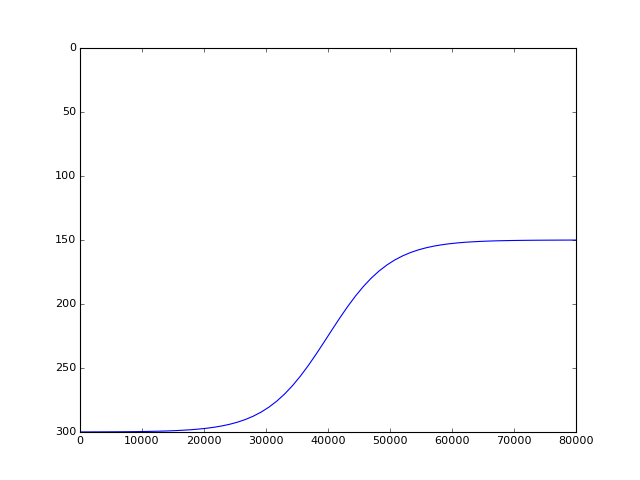

In [72]:
## Model Params:  

I = 64; J = 128;
omega = 2.*np.pi/12.4/3600.;
f = 1.e-4;  
Nsq0 = 0.01**2;
k = 0. # along-shelf wavenumber (rad/m)


x = np.linspace(0.,80e3,I)
dx = x[2]-x[1]

# Some topo:
H = 225 - 75*np.tanh(0.1e-3*(x-40e3))
Hx = np.gradient(H,dx)
Hxx = np.gradient(Hx,dx)
logging.debug('Hi')
print '%d'%len(Hx)
print Hxx

if doplot>1:
    fig,ax = plt.subplots()
    ax.plot(x,H)
    ax.set_ylim([300,0])

In [73]:
# set up matrix multipliers...
P1 = np.zeros((J,J));
P2 = np.zeros((J,J));
for j in range(1,J-1):
    P1[j,j-1]=-1;P1[j,j+1]=1;
    P2[j,j-1]=1;P2[j,j]=-2;P2[j,j+1]=1;
P1[0,1]=1;P1[J-1,J-2]=-1;
P2[0,0]=-2; P2[0,1]=1;P2[J-1,J-2]=1;P2[J-1,J-1]=-2;

z = np.linspace(0.,1.,J)
Z = np.diag(z,k=0)
eye = np.eye(J)

0.000103754303844


<IPython.core.display.Javascript object>


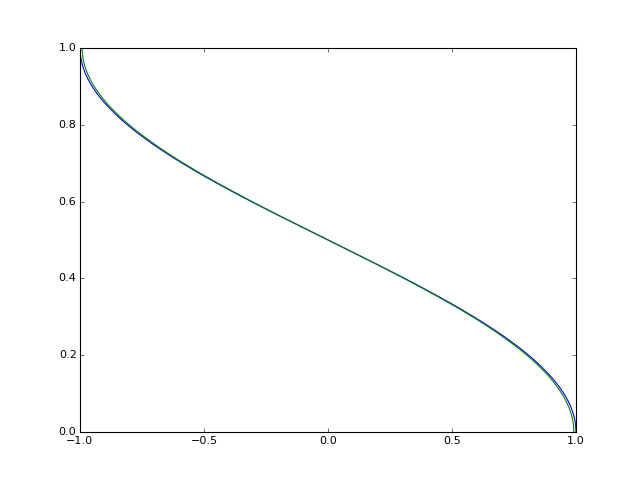

In [74]:
## To get started, we need P01, P02, and E and Ep...

### P0:  Amp*exp(j(kn x - om t + k y))phi(z)
phi = np.cos(z*np.pi)
k1 = (np.pi/H[0])**2 * (omega**2-f**2)/(Nsq0-omega**2) - k**2
k1 = np.sqrt(k1)
print k1
Amp = 1.0
P01 =  Amp*phi
P02 =  Amp*phi*np.exp(1j*(k1*x[1]))
if doplot>1:
    fig,ax=plt.subplots()
    ax.plot(P01,z,P02,z)


<IPython.core.display.Javascript object>


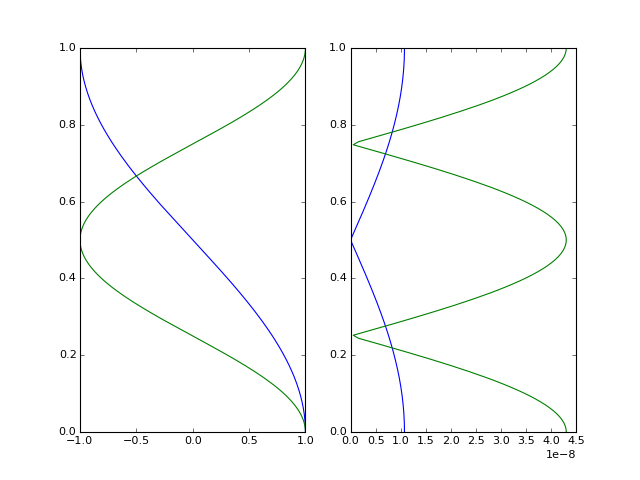

In [75]:
### E and Ep
# for general Nsq we need to solve the eignevalue problem.  Lets be lazy here.
E = np.zeros((J,J))*1j
Ep = np.zeros((J,J))*1j
for j in range(J):
    E[:,j]=np.cos((j+1)*z*np.pi)
    kk = ((j+1)*np.pi/H[0])**2 * (omega**2-f**2)/(Nsq0-omega**2) - k**2
    Ep[:,j]=1j*kk*np.cos((j+1)*z*np.pi)

if doplot>1:
    fig,ax=plt.subplots(1,2)
    ax[0].plot(E[:,0],z);ax[0].plot(E[:,1],z)
    ax[1].plot(np.abs(Ep[:,0]),z);ax[1].plot(np.abs(Ep[:,1]),z)
    

In [93]:
## so get B1, C1, D1
Ee = Ep*np.linalg.inv(E)

B = Ee - eye
C = I
D = P02 - (Ee+eye)*P01

alpha=[]
beta=[]
for i in range(I+1):
    alpha.append(np.zeros((J,J)))    
    beta.append(np.zeros((J)))
alpha[0]=np.linalg.inv(B)*C
beta[0]=np.linalg.inv(B)*D
lamsq = (omega**2-f**2)/(Nsq0 - omega**2)
gamsq = lamsq/(Nsq0 - omega**2)
for i in range(1,I):
    # get A, B , C , D
    D = 0
    
    a = -2*z/H[i]*Hx[i]
    b = z**2*Hx[i]**2/H[i]**2-lamsq/H[i]**2
    c = gamsq/H[i]**2 * 0 + 2.*z/H[i]**2*Hx[i]**2-z/H[i]*Hxx[i]
    ## A: 
    
    # 
    bb = np.linalg.inv(A*alpha[i-1]+B)
    alpha[i]=-bb*C
    beta[i]=-bb*(D-A*beta[i-1])

/Users/jklymak/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:25: RuntimeWarning: overflow encountered in multiply
/Users/jklymak/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:25: RuntimeWarning: invalid value encountered in multiply


In [96]:
print np.shape(b)

(128,)
